In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LinearRegression
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import ydata_profiling
from sklearn.tree import export_graphviz
from collections import defaultdict
from sklearn.tree import DecisionTreeRegressor
import graphviz
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from mpl_toolkits.mplot3d import Axes3D


In [83]:
data = pd.read_csv(r'C:\Users\SunInternet.ir\Desktop\data\housing.csv')

In [84]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [85]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [87]:
data.shape

(20640, 10)

In [88]:
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [90]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [91]:
numeric_df = data.select_dtypes(include=['number'])

In [92]:
numeric_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [93]:
numeric_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

THis is the NAN data

In [94]:
df = numeric_df

print(f"DataFrame orginal: {df} ")


imputer_mean = SimpleImputer(strategy='median')
df_filled_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)
print(df_filled_mean)

DataFrame orginal:        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  m

In [95]:
df_filled_mean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


whiten dataset

In [96]:

df_standardized = (df_filled_mean - df_filled_mean.mean()) / df_filled_mean.std()

pca = PCA(whiten=True)
df_whitened = pca.fit_transform(df_standardized)

In [97]:
df_whitened

array([[-0.99537362,  0.39810543,  2.75877692, ..., -0.52952829,
         1.06043233, -0.65434565],
       [ 1.53018771,  0.94665246,  2.21372449, ..., -0.71574607,
        -0.68676878,  1.82376857],
       [-0.95536654,  0.61671682,  2.05136833, ..., -0.3001096 ,
         0.247818  , -0.51031001],
       ...,
       [-0.25818152,  1.52678492, -0.78920481, ...,  1.09696002,
         1.77155833,  0.58120457],
       [-0.46744185,  1.51210157, -0.75263415, ...,  0.91280733,
         1.58503153,  0.40352131],
       [ 0.04078788,  1.52553896, -0.63900127, ...,  0.67074633,
         1.86813105,  0.06343949]])

Normal dataset

In [98]:
standard_scaler = StandardScaler()

df_normalized_array  = standard_scaler.fit_transform(df_whitened)


CORR

In [99]:
coor_matrix = numeric_df.corr()

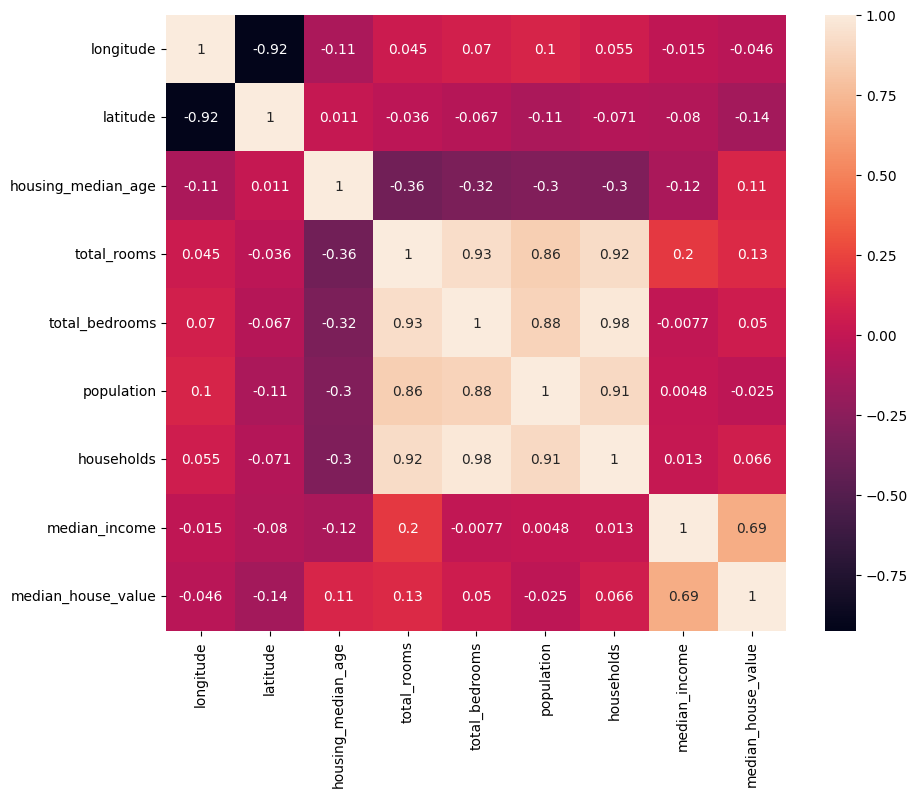

In [100]:
numeric_df = numeric_df
corr_matrix = numeric_df.corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

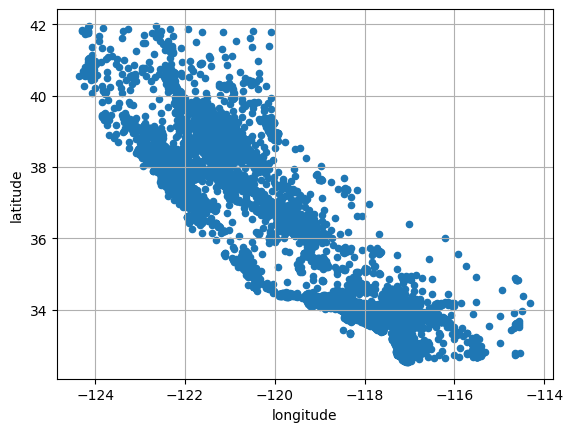

In [101]:
df.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

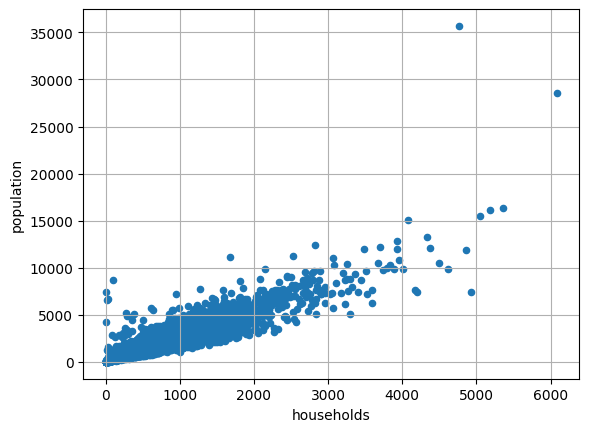

In [102]:
df.plot(kind="scatter", x="households", y="population", grid=True)
plt.show()

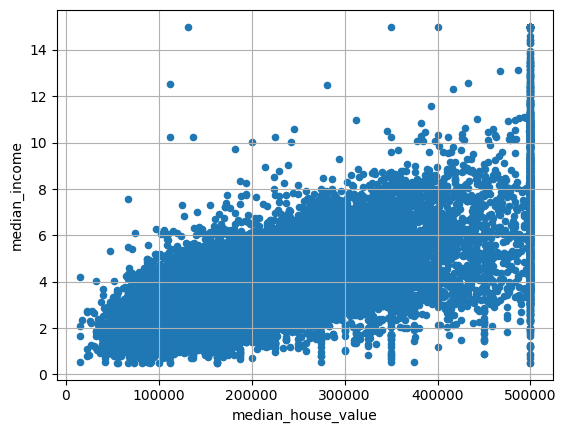

In [103]:

df.plot(kind="scatter", x="median_house_value", y="median_income", grid=True)
plt.show()

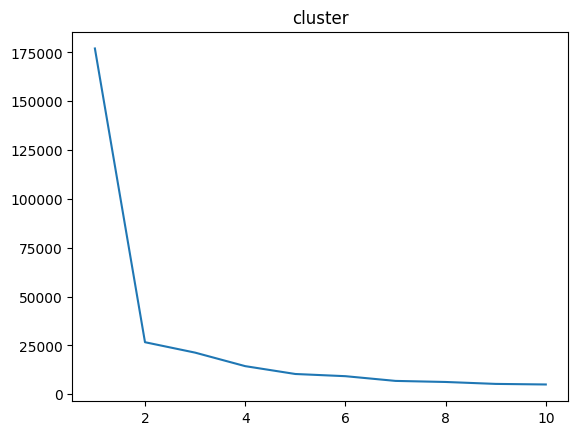

In [104]:
from sklearn.cluster import KMeans

data = df[['longitude','latitude' ]]
list1 = []


for i in range(1,11):
    kamen = KMeans(n_clusters=i)
    kamen.fit(data)
    list1.append(kamen.inertia_)
    
    
plt.plot(range(1,11),list1)
plt.title('cluster')
plt.show()
    


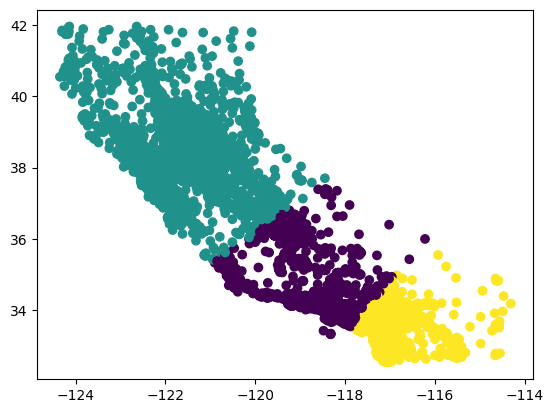

In [105]:

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['longitude','latitude' ]])

cluster_labels = kmeans.labels_


plt.scatter(df['longitude'], df['latitude'], c=cluster_labels, cmap='viridis')
plt.show()

 Use DT classification

In [106]:
label_encoder = LabelEncoder()
label_encoder.fit(data['ocean_proximity'])
encoded_type = label_encoder.transform(data['ocean_proximity'])
encoded_type

KeyError: 'ocean_proximity'

In [ ]:
encoded_dataset = data.copy()
encoded_dataset['ocean_proximity'] = encoded_type
encoded_dataset= encoded_dataset.drop('ocean_proximity', axis = 1)
encoded_dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
X_tree = encoded_dataset.iloc[:, :-1].values
Y_tree = encoded_dataset.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X_tree, Y_tree, test_size=.2, random_state=41)

In [ ]:
# dtree = DecisionTreeClassifier()
# dtree = dtree.fit(X_train, Y_train)
# features = ['longitude', 'latitude']
# tree.plot_tree(dtree, feature_names=features)

In [ ]:
df_normalized_array

array([[-0.99539774,  0.39811507,  2.75884375, ..., -0.52954112,
         1.06045802, -0.6543615 ],
       [ 1.53022478,  0.94667539,  2.21377812, ..., -0.71576341,
        -0.68678541,  1.82381275],
       [-0.95538969,  0.61673176,  2.05141803, ..., -0.30011687,
         0.247824  , -0.51032237],
       ...,
       [-0.25818777,  1.52682191, -0.78922393, ...,  1.0969866 ,
         1.77160125,  0.58121865],
       [-0.46745317,  1.5121382 , -0.75265239, ...,  0.91282945,
         1.58506992,  0.40353109],
       [ 0.04078887,  1.52557592, -0.63901675, ...,  0.67076258,
         1.8681763 ,  0.06344103]])

In [ ]:
df_normalized = pd.DataFrame(df_normalized_array, columns=df.columns)

In [ ]:
df_normalized = pd.DataFrame(df_normalized_array, columns=df.columns)

X = df_normalized[['longitude', ]]
Y = df_normalized['latitude']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'this is the mse: {mse}')
print(f'this is the r2 {r2}')

this is the mse: 1.0125655952155193
this is the r2 -8.429872237458724e-05


Use DT classification

In [ ]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16]])
y = np.array([0, 1, 0, 1, 0, 1, 0, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ساخت مدل KNN
knn = KNeighborsClassifier(n_neighbors=3)

# آموزش مدل
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 87, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_resp

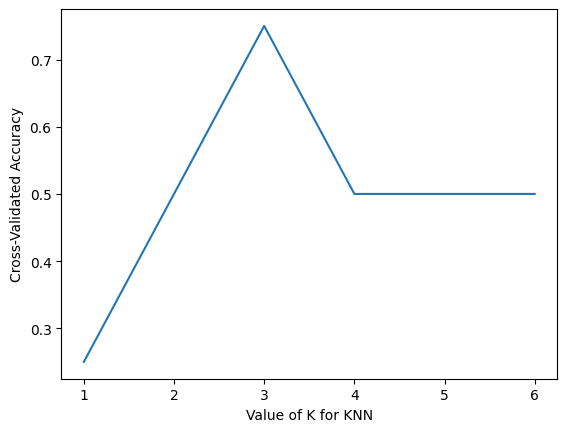

In [ ]:
k_range = range(1, 9)  # در این داده‌های ساختگی ما حداکثر 8 نمونه داریم
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=4, scoring='accuracy')  # استفاده از 4-fold cross-validation
    k_scores.append(scores.mean())

# رسم نمودار دقت برای k های مختلف
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Linear Regression MSE: 0.653699513717002, R2: 0.4203137289819706
Polynomial Regression MSE: 0.6358406072820805, R2: 0.4361506122264659


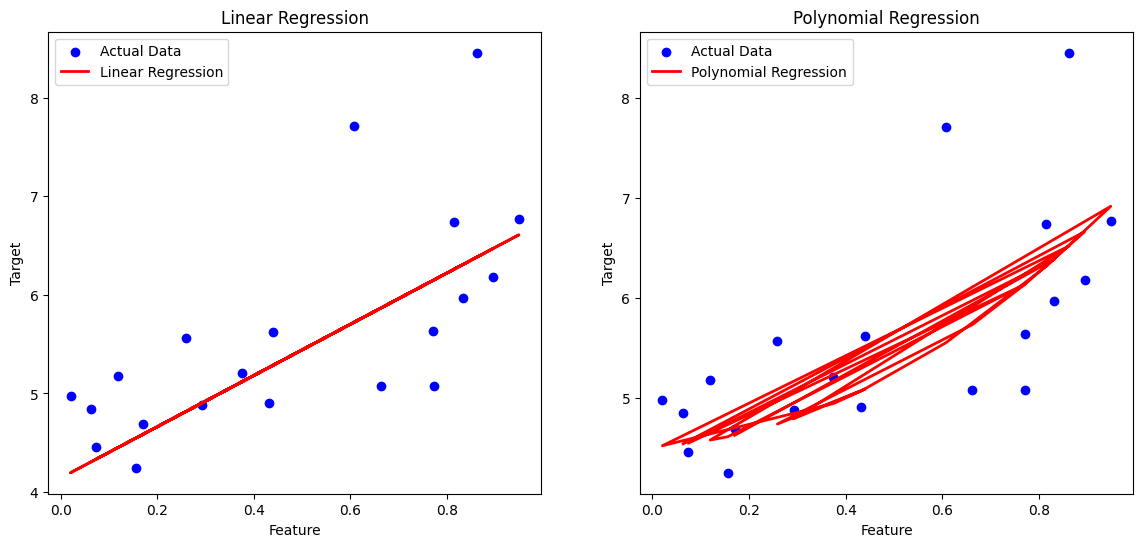

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ساخت داده‌های ساختگی ژنتیکی
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 نمونه با یک ویژگی
y = 4 + 3 * X + np.random.randn(100, 1)  # تابع خطی با نویز

# تقسیم داده‌ها به آموزشی و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# رگرسیون خطی
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# ارزیابی رگرسیون خطی
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print(f'Linear Regression MSE: {mse_lin}, R2: {r2_lin}')

# رگرسیون چندجمله‌ای با درجه 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

X_test_poly = poly_features.transform(X_test)
y_pred_poly = poly_reg.predict(X_test_poly)

# ارزیابی رگرسیون چندجمله‌ای
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'Polynomial Regression MSE: {mse_poly}, R2: {r2_poly}')

# رسم نمودارها
plt.figure(figsize=(14, 6))

# رگرسیون خطی
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_lin, color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

# رگرسیون چندجمله‌ای
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_poly, color='red', linewidth=2, label='Polynomial Regression')
plt.title('Polynomial Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()

plt.show()

# TSM


In [107]:
import pandas as pd
from random import randint as rnd
from random import shuffle
import numpy as np

number_city = 4
population_size = 4
epoch = 1

def read_dataset(file_path):
    df = pd.read_csv(file_path)
    cities = df[['latitude', 'longitude']].values.tolist()
    return cities

def init_population(n):
    population_list = []
    for _ in range(population_size):
        path = list(range(n))
        shuffle(path)
        population_list.append(path)
    return population_list

def calculate_distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def total_distance(path, cities):
    distance = 0
    for i in range(len(path)):
        distance += calculate_distance(cities[path[i]], cities[path[(i + 1) % len(path)]])
    return distance

def cross_over(population, cities):
    new_population = []
    for i in range(len(population)):
        parent1 = population[i]
        parent2 = population[(i + 1) % len(population)]
        cut = len(parent1) // 2
        child = parent1[:cut] + [city for city in parent2 if city not in parent1[:cut]]
        new_population.append(child)
    return new_population

def genetic_algorithm(cities):
    current_population = init_population(len(cities))
    for _ in range(epoch):
        current_population = cross_over(current_population, cities)
        current_population.sort(key=lambda path: total_distance(path, cities))
    return current_population[0]

if __name__ == '__main__':
    file_path = r'C:\Users\SunInternet.ir\Desktop\data\housing.csv'
    cities = read_dataset(file_path)
    best_path = genetic_algorithm(cities)
    best_distance = total_distance(best_path, cities)
    
    print("Best path:", best_path)
    print("Best path (city names):", [cities[i] for i in best_path])
    print("Total distance of best path:", best_distance)

Best path: [19380, 12298, 13537, 15524, 15758, 1178, 5025, 12441, 20172, 1620, 6386, 18142, 5896, 14760, 9638, 11400, 20401, 12751, 10773, 10832, 15425, 13882, 9670, 12593, 12829, 11744, 19930, 16719, 14727, 6853, 17256, 4569, 16903, 11356, 14784, 3706, 3582, 5038, 3284, 6405, 12287, 2364, 9767, 4623, 13088, 18830, 19277, 1193, 2735, 7183, 10343, 15414, 506, 20599, 8260, 9268, 7877, 3452, 814, 18039, 9856, 358, 5512, 4934, 10904, 5225, 13235, 1759, 2825, 15091, 9216, 19981, 3386, 5017, 5093, 4036, 13841, 12757, 15955, 12320, 5763, 214, 5382, 20521, 2085, 5509, 2526, 10665, 13480, 20490, 12069, 16330, 3954, 18342, 17455, 4865, 14974, 2479, 6196, 19725, 3424, 18620, 812, 10242, 3994, 20455, 7610, 7727, 9357, 3156, 2400, 5991, 5088, 14194, 982, 13577, 2514, 17357, 16859, 5074, 16454, 3628, 8598, 14884, 4738, 2465, 8140, 12173, 9814, 11311, 11539, 9773, 11047, 2393, 6440, 15923, 2750, 9536, 13705, 14967, 19753, 1274, 14429, 12041, 15805, 19929, 13595, 13353, 16187, 4925, 3642, 10477, 4654,

In [108]:
X_path = best_path
Y_path = cities

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_path, Y_path, test_size=0.2, random_state=42)

In [110]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [111]:
X_train_new = pd.DataFrame(X_train)

In [112]:
X_test_new = pd.DataFrame(X_test)

In [113]:
model_path = LinearRegression()
X_train_new = pd.DataFrame(X_train)
y_train_new = pd.DataFrame(y_train)
model_path.fit(X_train_new,y_train_new)

LinearRegression()

In [115]:
X_test_new = pd.DataFrame(X_test)
y_pred_lin = lin_reg.predict(X_test_new)

NameError: name 'lin_reg' is not defined

In [116]:
y_pred_lin

NameError: name 'y_pred_lin' is not defined

# TF-IDF

In [117]:
documents = data['ocean_proximity'].astype(str).tolist()


KeyError: 'ocean_proximity'

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

NameError: name 'documents' is not defined

In [ ]:
tfidf_matrix

NameError: name 'tfidf_matrix' is not defined

In [ ]:
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix:
[[0.         0.79647488 0.         0.         0.60467161 0.        ]
 [0.         0.79647488 0.         0.         0.60467161 0.        ]
 [0.         0.79647488 0.         0.         0.60467161 0.        ]
 ...
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.        ]]


In [ ]:
print("Feature Names:")
print(vectorizer.get_feature_names_out())


Feature Names:
['1h' 'bay' 'inland' 'island' 'near' 'ocean']


In [ ]:
print("TF-IDF Matrix Shape:")
print(tfidf_matrix.shape)

TF-IDF Matrix Shape:
(20640, 6)


# DFS

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.iterrows()

<generator object DataFrame.iterrows at 0x0000017D61E14150>

In [ ]:
graph = defaultdict(set)
for _, row in data.iterrows():
    source = str(row['longitude'])
    target = str(row['latitude'])
    graph[source].add(target)
    graph[target].add(source)  

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    
    print(start)
    
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

dfs(graph, '3')

3


{'3'}

# BFS 

In [ ]:


graph = collections.defaultdict(list)
for _, row in data.iterrows():
    source = int(row['longitude'])
    target = int(row['latitude'])
    graph[source].append(target)

def bfs(graph, root):
    visited, queue = set(), collections.deque([root])
    visited.add(root)
    while queue:
        vertex = queue.popleft()
        print(str(vertex) + " ", end="")
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)


bfs(graph, 3)

3 

## PSO

Iteration 0/100, Best Value: 68.68113763360753
Iteration 10/100, Best Value: 25.56009074318225
Iteration 20/100, Best Value: 22.80224251664413
Iteration 30/100, Best Value: 22.73807884234895
Iteration 40/100, Best Value: 22.73784917025362
Iteration 50/100, Best Value: 22.73784917025362
Iteration 60/100, Best Value: 22.737849127761503
Iteration 70/100, Best Value: 22.73784911083889
Iteration 80/100, Best Value: 22.737849110816317
Iteration 90/100, Best Value: 22.73784911081497
Iteration 99/100, Best Value: 22.73784911081497


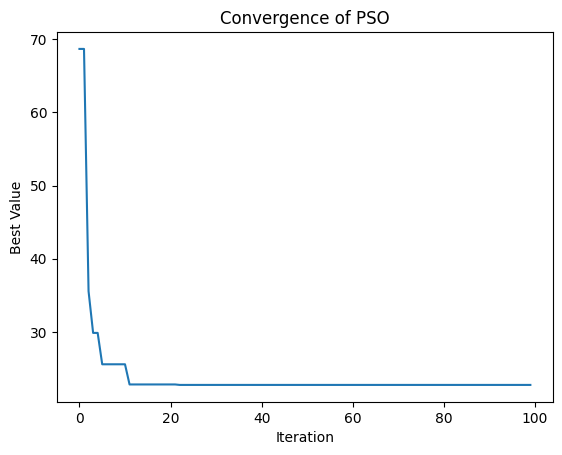

Best parameters found: a = -3.0671441739106142 b = -10.0


In [125]:
import numpy as np
import matplotlib.pyplot as plt

data_x = data['latitude']
data_y = data['longitude']
def objective_function(params):
    a, b = params
    predictions = a * data_x + b
    mse = np.mean((data_y - predictions) ** 2)
    return mse

num_particles = 30
num_dimensions = 2
num_iterations = 100
inertia_weight = 0.5
cognitive_constant = 2.0
social_constant = 2.0
bounds = (-10, 10)


particles_position = np.random.uniform(bounds[0], bounds[1], (num_particles, num_dimensions))
particles_velocity = np.zeros((num_particles, num_dimensions))
personal_best_position = np.copy(particles_position)
personal_best_value = np.array([objective_function(p) for p in particles_position])
global_best_value = np.min(personal_best_value)
global_best_position = personal_best_position[np.argmin(personal_best_value)]


best_values = []

for iteration in range(num_iterations):
    for i in range(num_particles):

        inertia = inertia_weight * particles_velocity[i]
        cognitive = cognitive_constant * np.random.rand() * (personal_best_position[i] - particles_position[i])
        social = social_constant * np.random.rand() * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia + cognitive + social
        

        particles_position[i] += particles_velocity[i]
        

        particles_position[i] = np.clip(particles_position[i], bounds[0], bounds[1])
        

        current_value = objective_function(particles_position[i])
        if current_value < personal_best_value[i]:
            personal_best_position[i] = particles_position[i]
            personal_best_value[i] = current_value

        if current_value < global_best_value:
            global_best_position = particles_position[i]
            global_best_value = current_value
    

    best_values.append(global_best_value)
    

    if iteration % 10 == 0 or iteration == num_iterations - 1:
        print(f"Iteration {iteration}/{num_iterations}, Best Value: {global_best_value}")


plt.plot(best_values)
plt.xlabel("Iteration")
plt.ylabel("Best Value")
plt.title("Convergence of PSO")
plt.show()


print("Best parameters found: a =", global_best_position[0], "b =", global_best_position[1])

## LinearRegression

Shape of data: (100, 3)
Columns in data: Index(['latitude', 'longitude', 'altitude'], dtype='object')
Shape of X: (100, 2)
Shape of Y: (100,)


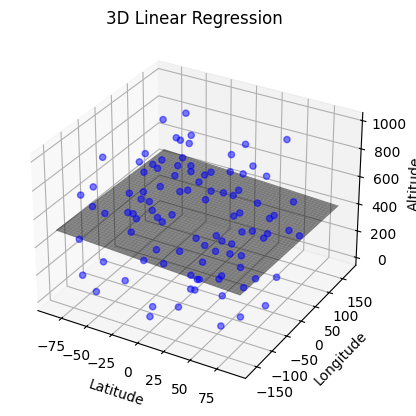

Coefficients (slopes): [-0.35707742 -0.10586511]
Intercept (bias): 457.0870714107992


In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# فرض کنید data یک DataFrame است و شامل ستون‌های latitude, longitude و altitude است
data = pd.DataFrame({
    'latitude': np.random.rand(100) * 180 - 90,  # تولید داده‌های تصادفی برای latitude
    'longitude': np.random.rand(100) * 360 - 180,  # تولید داده‌های تصادفی برای longitude
    'altitude': np.random.rand(100) * 1000  # تولید داده‌های تصادفی برای altitude
})

# بررسی اولیه شکل داده‌ها
print("Shape of data:", data.shape)
print("Columns in data:", data.columns)

# استخراج ویژگی‌ها و متغیر هدف
X = data[['latitude', 'longitude']].values
Y = data['altitude'].values

# بررسی سازگاری تعداد نمونه‌های X و Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

# ایجاد مدل رگرسیون خطی
model = LinearRegression()

# آموزش مدل با داده‌ها
model.fit(X, Y)

# پیش‌بینی مقادیر خروجی
Y_pred = model.predict(X)

# ایجاد یک شبکه از نقاط برای رسم سطح
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
onlyX = np.array([x_surf.ravel(), y_surf.ravel()]).T

# پیش‌بینی مقادیر خروجی برای شبکه نقاط
fittedY = model.predict(onlyX).reshape(x_surf.shape)

# ایجاد نمودار سه‌بعدی
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# رسم نقاط داده‌ها
ax.scatter(X[:, 0], X[:, 1], Y, color='blue', marker='o', alpha=0.5)

# رسم سطح رگرسیون
ax.plot_surface(x_surf, y_surf, fittedY, color='None', alpha=0.5)

# برچسب‌گذاری محورها
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')

plt.title('3D Linear Regression')
plt.show()

# نمایش ضرایب رگرسیون و مقدار بایاس
print("Coefficients (slopes):", model.coef_)
print("Intercept (bias):", model.intercept_)

## PolynomialFeatures

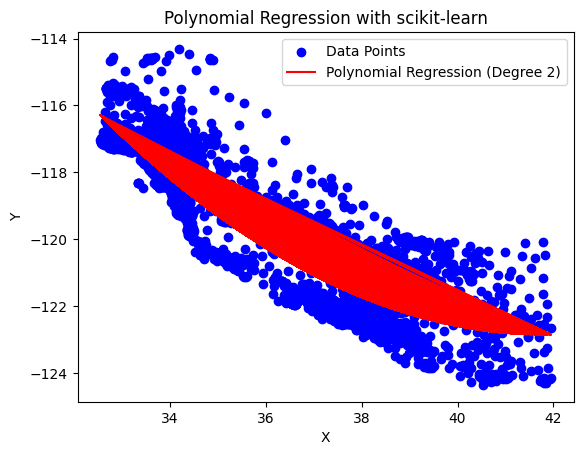

Coefficients: [ 0.         -6.34456839  0.07580009]
Intercept (b): 9.915239074228154


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data_x = data['latitude'].values.reshape(-1, 1) 
data_y = data['longitude'].values

degree = 2
poly = PolynomialFeatures(degree)
data_x_poly = poly.fit_transform(data_x)


model = LinearRegression()

model.fit(data_x_poly, data_y)


predicted_y = model.predict(data_x_poly)


plt.scatter(data_x, data_y, color='blue', label='Data Points')
plt.plot(data_x, predicted_y, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression with scikit-learn')
plt.legend()
plt.show()

# نمایش پارامترهای مدل
print("Coefficients:", model.coef_)
print("Intercept (b):", model.intercept_)

## DecisionTreeClassifier

c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\SunInternet.ir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Accuracy: 0.6928294573643411
Confusion Matrix:
[[  16    1    4    2    1    0    0    0    0    0    0]
 [   3    2    4   15    5    1    0    0    0    0    0]
 [   5    5  654  102    6    2    0    0    0    0    0]
 [   2    6  194  394   13   17    0    1    0    0    0]
 [   1    4   88   40   52   14    6    1    0    0    0]
 [   0    0    7   21   11  181   52    3    0    0    0]
 [   0    0    4    2   16   18 1073   47    2    0    0]
 [   0    0    0    0    7    5  389  488    1    1    0]
 [   0    0    0    0    0    0   41   72    0    0    0]
 [   0    0    0    1    0    0    0   15    0    0    0]
 [   0    0    0    0    0    1    3    6    0    0    0]]
Classification Report:
              precision    recall  f1-score   support

        -124       0.59      0.67      0.63        24
        -123       0.11      0.07      0.08        30
        -122       0.68      0.84      0.76       774
        -121       0.68      0.63      0.65       627
        -120       0

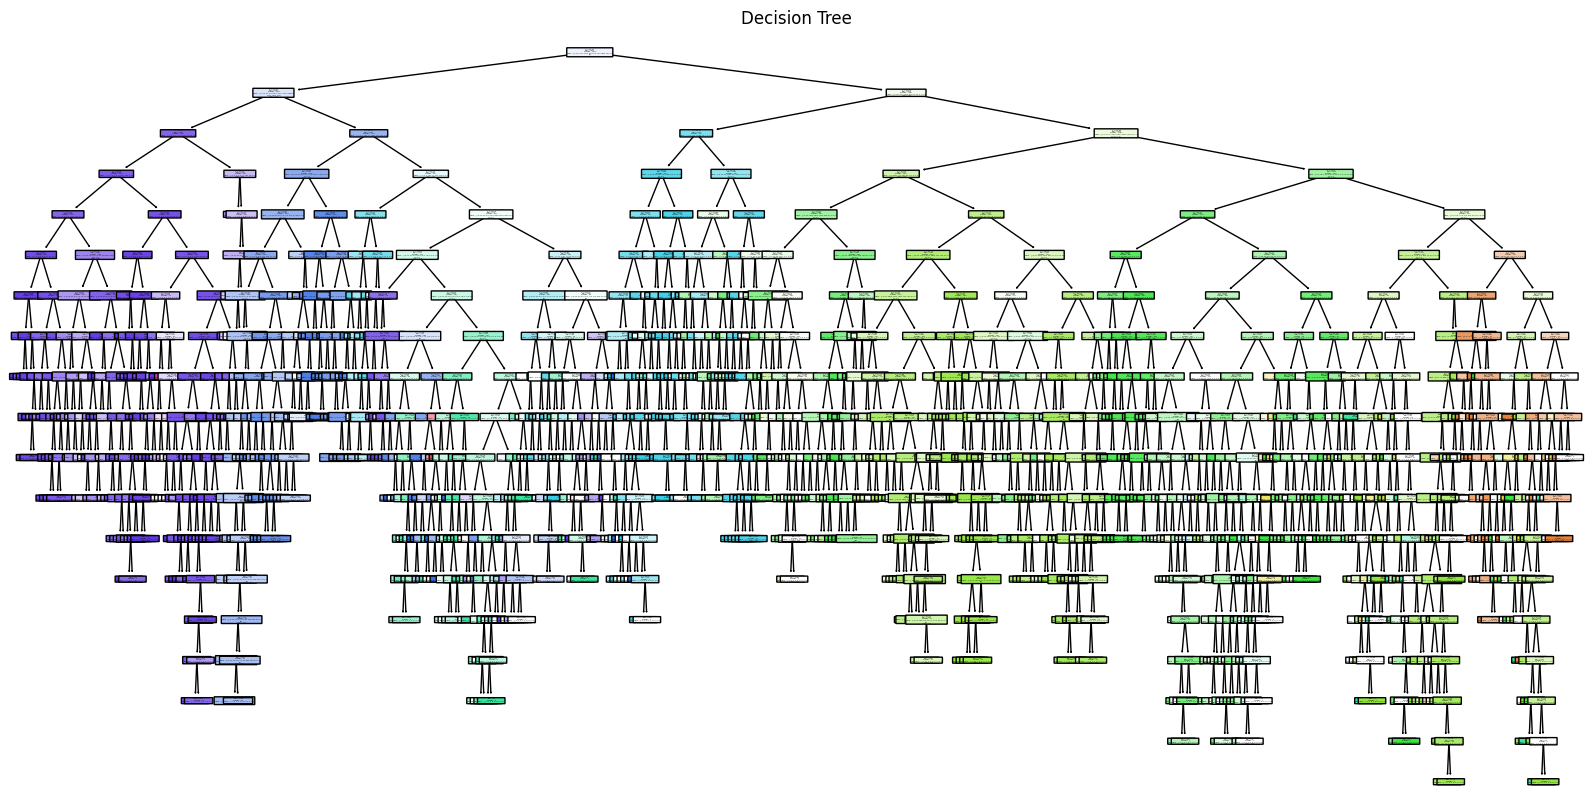

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# استخراج مقادیر X و Y
data_x = data['latitude'].values.reshape(-1, 1)  # تبدیل به ماتریس دو بعدی
data_y = data['longitude'].values

# تبدیل برچسب‌ها به دسته‌بندی‌های گسسته در صورت لزوم
data_y = data_y.astype(int)

# تقسیم داده‌ها به مجموعه آموزشی و آزمون
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

# ایجاد مدل درخت تصمیم
model = DecisionTreeClassifier()

# آموزش مدل با استفاده از داده‌ها
model.fit(X_train, y_train)

# پیش‌بینی با استفاده از مدل آموزش دیده
y_pred = model.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# استخراج نام کلاس‌ها از داده‌های آموزشی
class_names = [str(cls) for cls in np.unique(y_train)]

# رسم نمودار درخت تصمیم
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=['X'], class_names=class_names, rounded=True)
plt.title('Decision Tree')
plt.show()

## NLTK

In [154]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SunInternet.ir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SunInternet.ir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [156]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import PorterStemmer

# nltk.download('punkt')
# nltk.download('stopwords')

# # بارگذاری داده‌ها
# data = pd.read_csv('text_data.csv')

# # استخراج مقادیر X و Y
# data_x = data['text'].values
# data_y = data['label'].values

# # پیش‌پردازش داده‌های متنی
# stop_words = set(stopwords.words('english'))
# ps = PorterStemmer()

# def preprocess_text(text):
#     tokens = word_tokenize(text.lower())
#     tokens = [word for word in tokens if word.isalnum()]
#     tokens = [word for word in tokens if word not in stop_words]
#     tokens = [ps.stem(word) for word in tokens]
#     return ' '.join(tokens)

# data_x = [preprocess_text(text) for text in data_x]

# # تبدیل متن به ویژگی‌های عددی
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data_x)

# # تقسیم داده‌ها به مجموعه آموزشی و آزمون
# X_train, X_test, y_train, y_test = train_test_split(X, data_y, test_size=0.2, random_state=42)

# # ایجاد مدل درخت تصمیم
# model = DecisionTreeClassifier()

# # آموزش مدل با استفاده از داده‌ها
# model.fit(X_train, y_train)

# # پیش‌بینی با استفاده از مدل آموزش دیده
# y_pred = model.predict(X_test)

# # ارزیابی مدل
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print('Confusion Matrix:')
# print(conf_matrix)
# print('Classification Report:')
# print(class_report)

# # رسم نمودار درخت تصمیم
# plt.figure(figsize=(20,10))
# plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=np.unique(y_train).astype(str), rounded=True)
# plt.title('Decision Tree')
# plt.show()

## DBSCAN

In [ ]:

X = data[['longitude','latitude']].values 

Number of clusters: 1
Number of noise points: 6


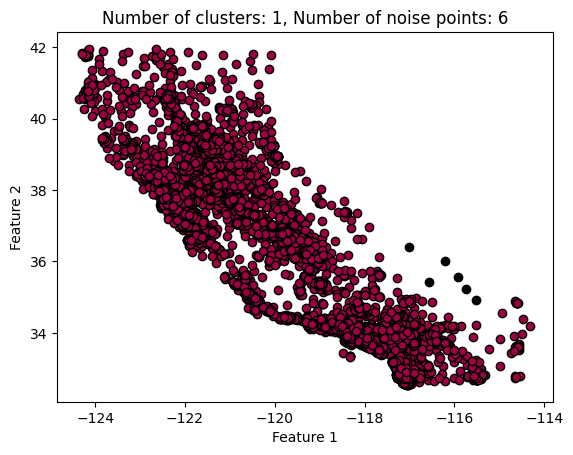

In [160]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt



# Assuming the data has two features we want to cluster
X = df[['longitude','latitude']].values   # Replace 'feature1' and 'feature2' with your actual column names

# Setting parameters for DBSCAN
eps = 0.5  # Maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point

# Running DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Plotting the results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Number of clusters: {n_clusters}, Number of noise points: {n_noise}')
plt.xlabel('Feature 1')  # Replace 'Feature 1' with the appropriate feature name
plt.ylabel('Feature 2')  # Replace 'Feature 2' with the appropriate feature name
plt.show()

## ANN

In [174]:

X = data.drop('latitude', axis=1).values
y = data['longitude'].values.reshape(-1, 1) 


encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
 
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def backward(self, X, y, output):
        m = y.shape[0]
        
      
        delta2 = output - y
        dW2 = np.dot(self.a1.T, delta2) / m
        db2 = np.sum(delta2, axis=0, keepdims=True) / m
        
        
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1) / m
        db1 = np.sum(delta1, axis=0, keepdims=True) / m
        
        
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 100 == 0:
                loss = -np.mean(y * np.log(output + 1e-8)) 
                print(f'Epoch {epoch}, Loss: {loss}')
    
    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)
    # ساخت شبکه عصبی
input_size = X_train.shape[1]
hidden_size = 10
output_size = y_train.shape[1]
learning_rate = 0.01

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)

epochs = 11
nn.train(X_train, y_train, epochs)

predictions = nn.predict(X_test)
accuracy = np.mean(predictions == np.argmax(y_test, axis=1))
print(f'Test accuracy: {accuracy}')


Epoch 0, Loss: 0.009822301599473374
Test accuracy: 0.0
